In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mpld3
from functions import dataToTimeSeries

In [2]:
df = pd.read_excel('./dataframes/all_downtimes.xlsx')
df

,LineID,LineDescription,ResourceID,ResourceNameNeu,ResourceName,DisplayOrder,StopGroupID,StopGroupNameNeu,StopGroupName,StopGroupDisabled,...,StopReasonDisabled,StopReasonReportExclude,PEStopGroupID,PEStopGroupNameNeu,PEStopGroupName,HarmoniseSourceID,FromTime,ToTime,DurationSec,Comment
0,49001003,GLA 03,1,Production stop,Produktion Stop,1,1,Grp. Prod. Stop,Grp. Prod. Stop,0,...,0,0,6.0,Group 6 (Stop for technical),Group 6 (Stop for technical),1001,2020-01-06 10:00:00.000,2020-01-06 11:00:00.000,3600,NaN
1,49001003,GLA 03,2,Melting stop,Schmelz Stop,2,2,Grp. Melt Stop,Grp. Schmelz Stop,0,...,0,0,4.0,Group 4 (Melt stop cupola),Group 4 (Melt stop cupola),1002,2020-01-06 10:00:00.000,2020-01-06 11:00:00.000,3600,NaN
2,49001003,GLA 03,3,Planned stop,Geplanter Stop,3,3,Grp. Plan. Stop,Grp. geplanlter stop,0,...,0,0,2.0,Group 2 (Holidays / overcapacity),Group 2 (Holidays / overcapacity),1003,2020-01-06 10:00:00.000,2020-01-06 11:00:00.000,3600,NaN
3,49001001,GLA 01,1,Production stop,Produktion Stop,1,1,Grp. Prod. Stop,Grp. Prod. Stop,0,...,0,0,6.0,Group 6 (Stop for technical),Group 6 (Stop for technical),1001,2020-01-06 13:30:00.000,2020-01-06 13:35:00.000,300,kein Harz
4,49001003,GLA 03,1,Production stop,Produktion Stop,1,1,Grp. Prod. Stop,Grp. Prod. Stop,0,...,0,0,6.0,Group 6 (Stop for technical),Group 6 (Stop for technical),1001,2020-01-06 14:53:48.000,2020-01-06 16:22:12.000,5304,Rückschlagventil gewechselt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4864,49001001,GLA 01,600,Filter Bypass,Filter Bypass,30,60000,Filter Bypass,Filter Bypass,0,...,0,0,NaN,NaN,NaN,1005,2023-05-03 06:11:32.000,2023-05-03 06:12:51.000,79,OPC
4865,49001003,GLA 03,1,Production stop,Produktion Stop,1,1,Grp. Prod. Stop,Grp. Prod. Stop,0,...,0,0,5.0,Group 5 (Stop for tapping),Group 5 (Stop for tapping),1001,2023-05-03 09:26:34.000,2023-05-03 10:16:00.000,2966,NaN
4866,49001003,GLA 03,600,Filter Bypass,Filter Bypass,30,60000,Filter Bypass,Filter Bypass,0,...,0,0,NaN,NaN,NaN,1005,2023-05-03 09:35:37.000,2023-05-03 09:35:52.000,15,OPC
4867,49001003,GLA 03,1,Production stop,Produktion Stop,1,5,Grp. Elec. Mainte.,Grp. Elec. Mainte.,0,...,0,0,6.0,Group 6 (Stop for technical),Group 6 (Stop for technical),1001,2023-05-03 10:16:00.000,2023-05-03 10:31:00.000,900,Reku Sicherung ausgelöst


In [3]:
df[['StopReasonName']]

,StopReasonName
0,Sonstige
1,Schmelz Stop
2,Feiertage
3,Bindemittelanl.
4,Pendelsäge
...,...
4864,Filter Bypass
4865,Eisen ablasen
4866,Filter Bypass
4867,Kupolofen


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4869 entries, 0 to 4868
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LineID                   4869 non-null   int64  
 1   LineDescription          4869 non-null   object 
 2   ResourceID               4869 non-null   int64  
 3   ResourceNameNeu          4869 non-null   object 
 4   ResourceName             4869 non-null   object 
 5   DisplayOrder             4869 non-null   int64  
 6   StopGroupID              4869 non-null   int64  
 7   StopGroupNameNeu         4869 non-null   object 
 8   StopGroupName            4869 non-null   object 
 9   StopGroupDisabled        4869 non-null   int64  
 10  StopReasonID             4869 non-null   int64  
 11  StopReasonNameNeu        4869 non-null   object 
 12  StopReasonName           4869 non-null   object 
 13  StopReasonDisabled       4869 non-null   int64  
 14  StopReasonReportExclude 

In [5]:
df['ResourceNameNeu'].unique()

array(['Production stop', 'Melting stop', 'Planned stop', 'Filter Bypass',
       'Emergency Cimney'], dtype=object)

In [6]:
df = df[(df['LineDescription']=='GLA 03') & (df['ResourceNameNeu'] == 'Production stop')]
df.shape

(1808, 23)

In [7]:
df = df.rename(columns={'FromTime':'DateTime'})
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['year'] = df['DateTime'].dt.year
grouped_year = pd.DataFrame(df.groupby('year')['year'].count())

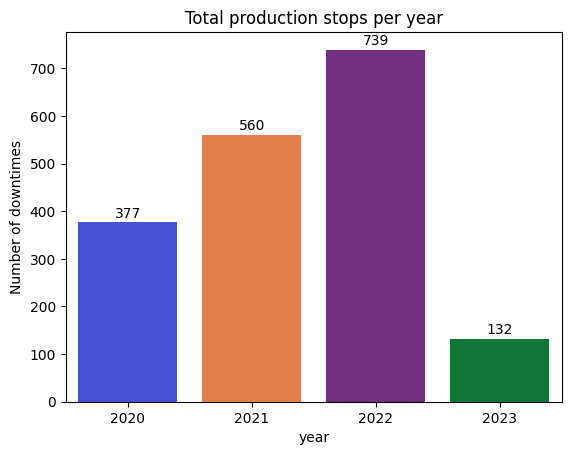

In [8]:
ax = sns.barplot(data=grouped_year, x=grouped_year.index, y='year', 
                 palette = ["#2F3EEA", "#FC7634", "#79238E", "#008835"])
ax.set_title("Total production stops per year")
ax.set_ylabel("Number of downtimes")

for i, v in enumerate(grouped_year['year']):
    ax.text(i, v+10, str(v), ha='center', fontsize=10)

plt.show()

In [9]:
data = df[['DateTime', 'ToTime']]

In [10]:
data['DateTime'] = pd.to_datetime(data['DateTime']).dt.floor('min')
data['ToTime'] = pd.to_datetime(data['ToTime']).dt.floor('min')
data.set_index('DateTime', inplace=True)
data['trigger'] = 1
data.head()

C:\Users\manda\AppData\Local\Temp\ipykernel_7384\1915830369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DateTime'] = pd.to_datetime(data['DateTime']).dt.floor('min')
C:\Users\manda\AppData\Local\Temp\ipykernel_7384\1915830369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToTime'] = pd.to_datetime(data['ToTime']).dt.floor('min')
C:\Users\manda\AppData\Local\Temp\ipykernel_7384\1915830369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,ToTime,trigger
DateTime,,
2020-01-06 10:00:00,2020-01-06 11:00:00,1
2020-01-06 14:53:00,2020-01-06 16:22:00,1
2020-01-06 17:48:00,2020-01-06 18:25:00,1
2020-01-08 00:46:00,2020-01-08 01:32:00,1
2020-01-08 21:59:00,2020-01-08 22:22:00,1


In [11]:
df_changed = data.resample('1T').asfreq()
df_changed.head()

,ToTime,trigger
DateTime,,
2020-01-06 10:00:00,2020-01-06 11:00:00,1.0
2020-01-06 10:01:00,NaT,NaN
2020-01-06 10:02:00,NaT,NaN
2020-01-06 10:03:00,NaT,NaN
2020-01-06 10:04:00,NaT,NaN


In [12]:
df_changed['ToTime'] = df_changed['ToTime'].fillna(method='ffill')
df_changed['trigger'] = df_changed['trigger'].fillna(0)

In [13]:
df_changed['downtime'] = df_changed.apply(lambda row: 1 if row['ToTime'] > row.name else 0, axis=1)

In [14]:
df_changed

,ToTime,trigger,downtime
DateTime,,,
2020-01-06 10:00:00,2020-01-06 11:00:00,1.0,1
2020-01-06 10:01:00,2020-01-06 11:00:00,0.0,1
2020-01-06 10:02:00,2020-01-06 11:00:00,0.0,1
2020-01-06 10:03:00,2020-01-06 11:00:00,0.0,1
2020-01-06 10:04:00,2020-01-06 11:00:00,0.0,1
...,...,...,...
2023-05-04 09:21:00,2023-05-03 10:31:00,0.0,0
2023-05-04 09:22:00,2023-05-03 10:31:00,0.0,0
2023-05-04 09:23:00,2023-05-03 10:31:00,0.0,0


c:\Users\manda\OneDrive - ROCKWOOL Group\Documents\Mthesis\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


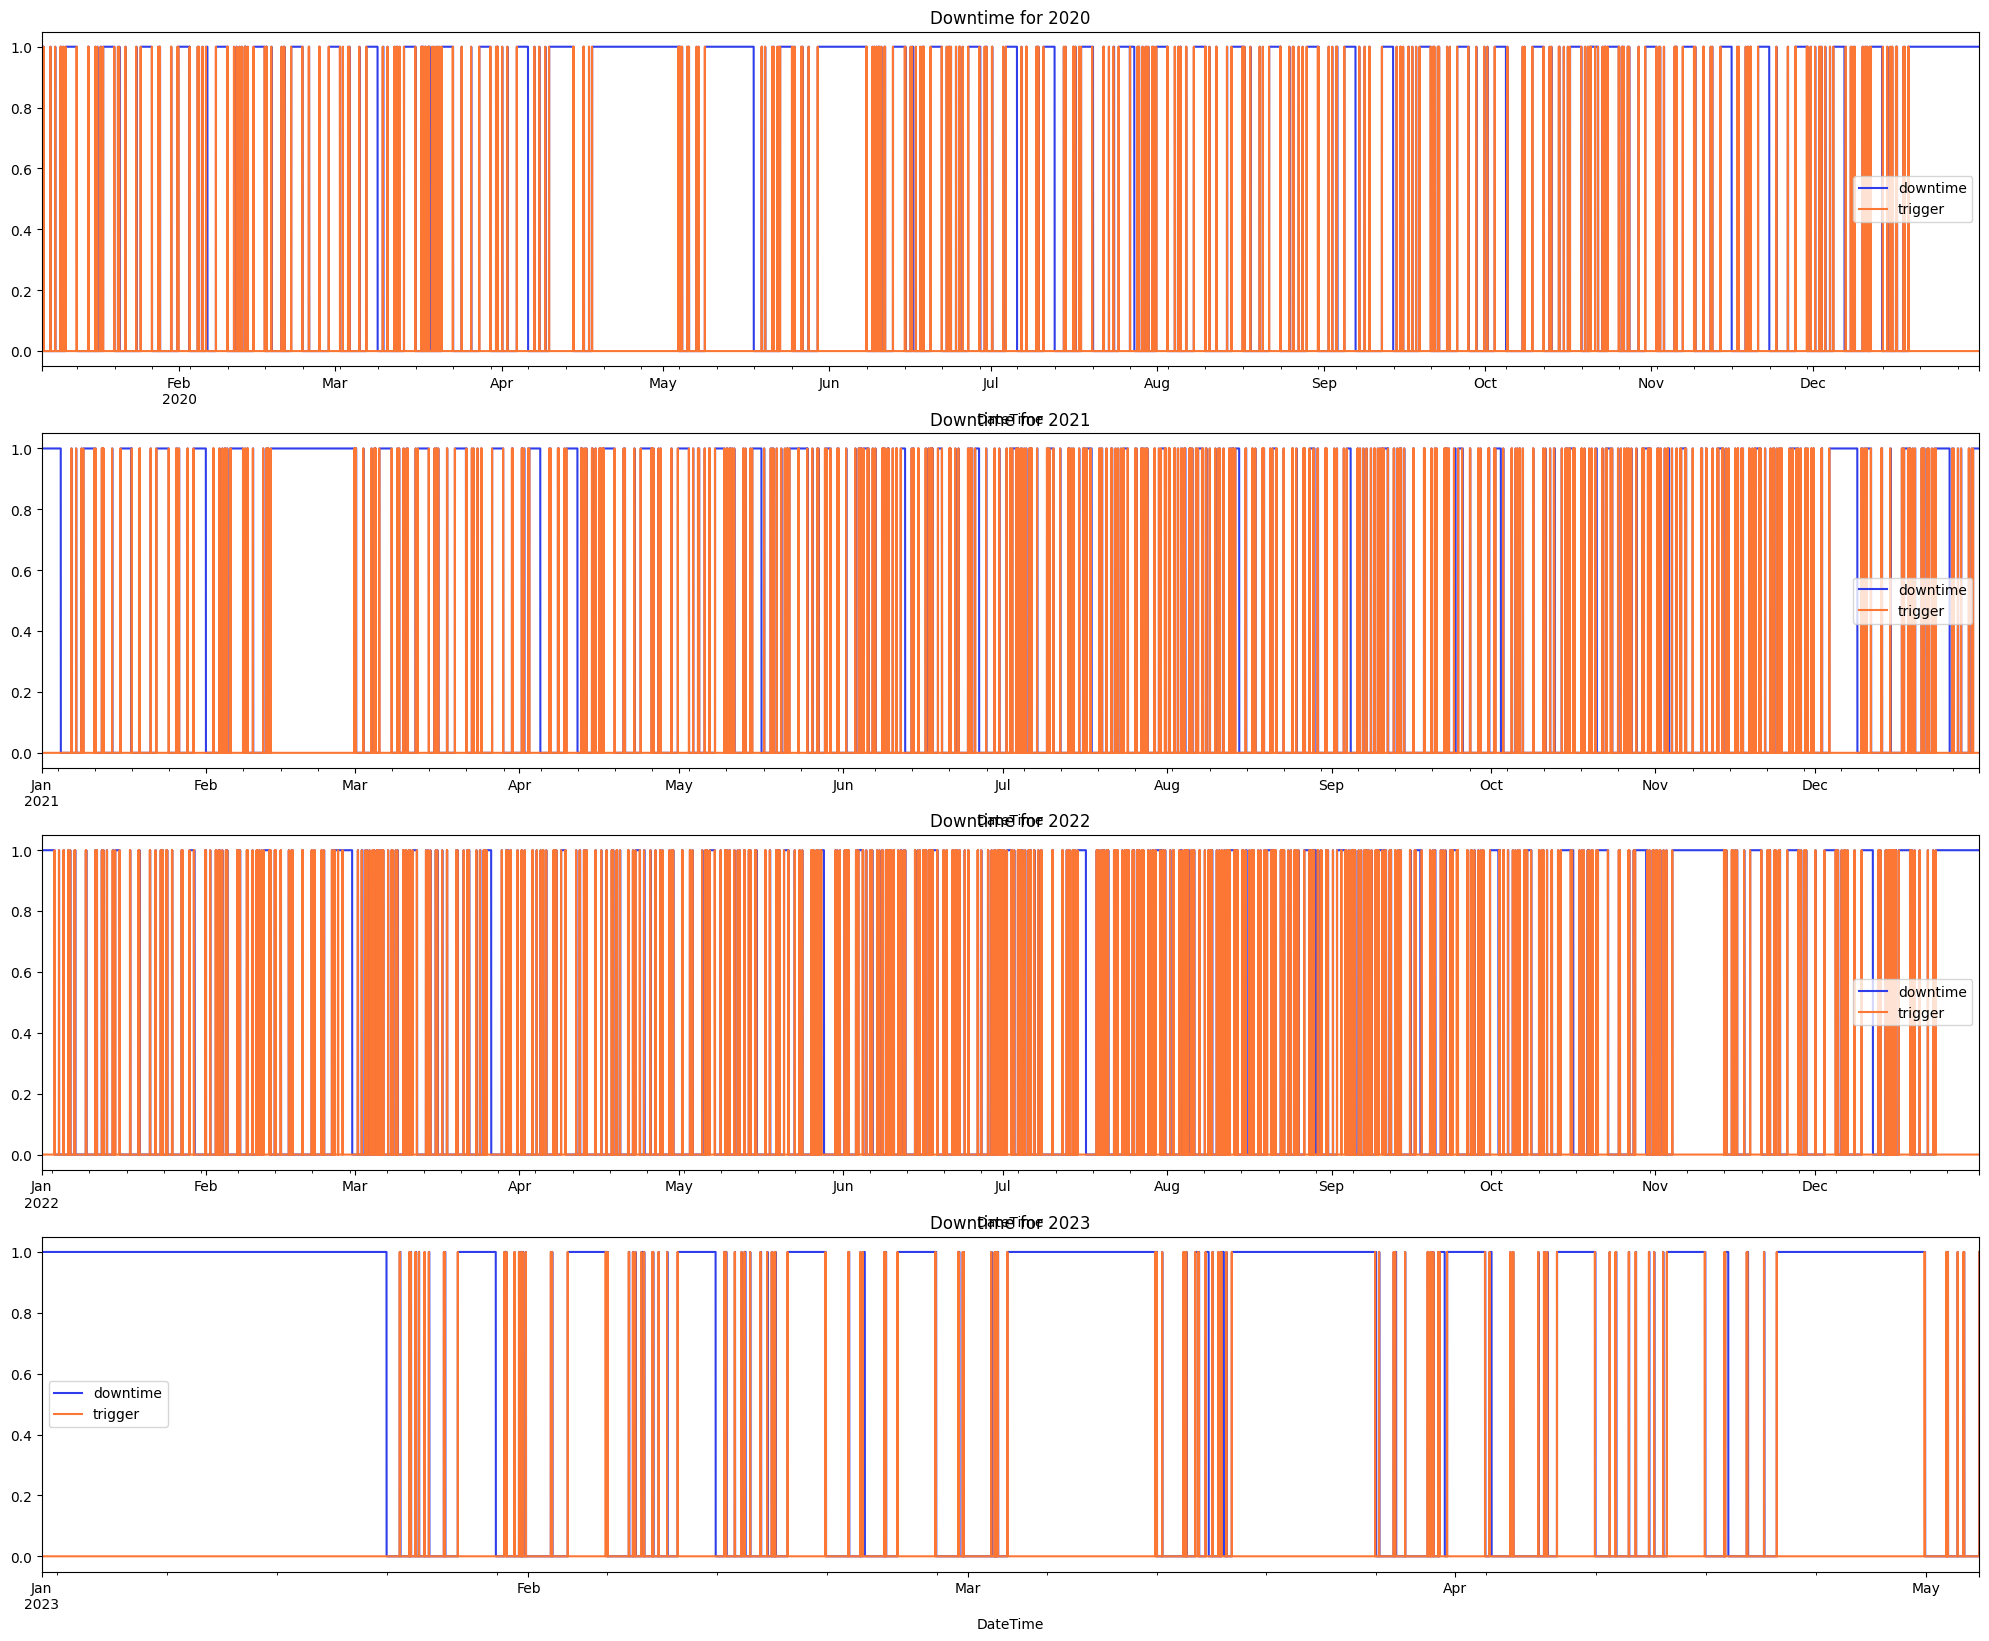

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(25,20))


df_changed[df_changed.index.year == 2020]['downtime'].plot(ax=ax1, color ="#2F3EEA")
df_changed[df_changed.index.year == 2021]['downtime'].plot(ax=ax2, color ="#2F3EEA")
df_changed[df_changed.index.year == 2022]['downtime'].plot(ax=ax3, color ="#2F3EEA")
df_changed[df_changed.index.year == 2023]['downtime'].plot(ax=ax4, color ="#2F3EEA")

df_changed[df_changed.index.year == 2020]['trigger'].plot(ax=ax1, color="#FC7634")
df_changed[df_changed.index.year == 2021]['trigger'].plot(ax=ax2, color="#FC7634")
df_changed[df_changed.index.year == 2022]['trigger'].plot(ax=ax3, color="#FC7634")
df_changed[df_changed.index.year == 2023]['trigger'].plot(ax=ax4, color="#FC7634")

ax1.set_title('Downtime for 2020')
ax2.set_title('Downtime for 2021')
ax3.set_title('Downtime for 2022')
ax4.set_title('Downtime for 2023')


ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.show()


Text(0.5, 1.0, 'Trigger')

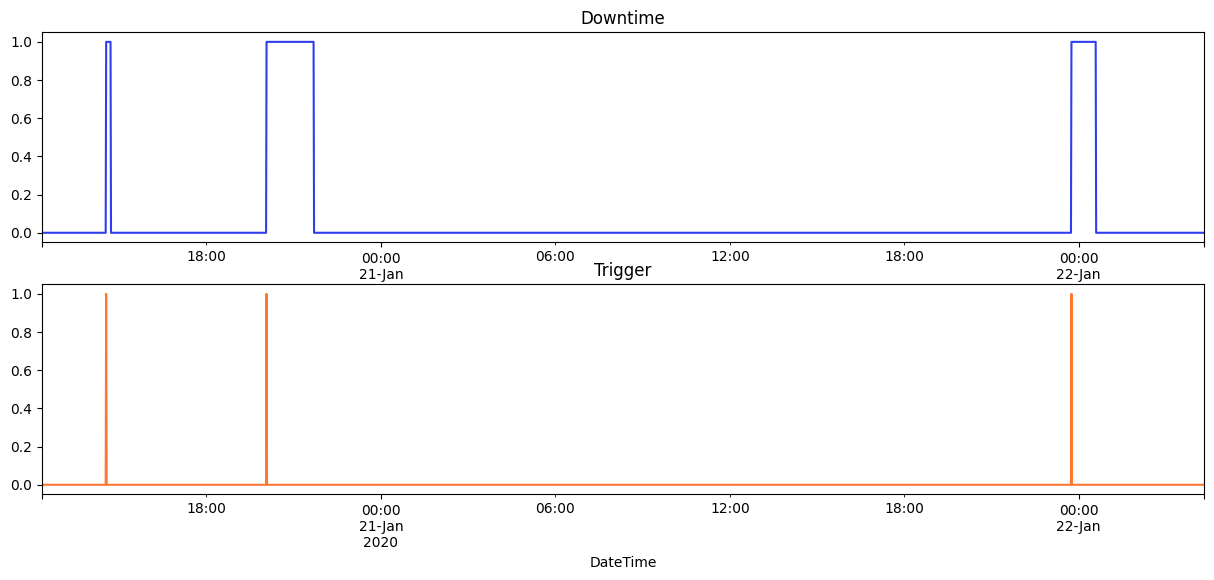

In [16]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,6))

df_changed[df_changed.index.year == 2020][20300:22700]['downtime'].plot(ax=ax1, color ="#2F3EEA")
df_changed[df_changed.index.year == 2020][20300:22700]['trigger'].plot(ax=ax2, color="#FC7634")

ax1.set_title('Downtime')
ax2.set_title('Trigger')

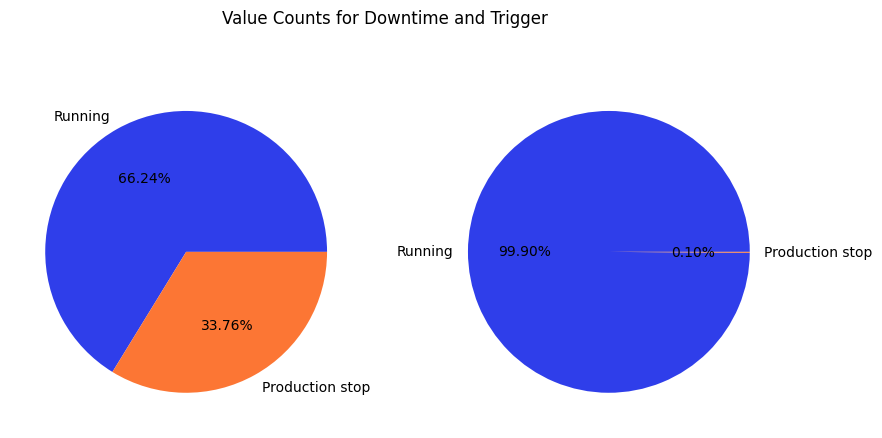

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


counts_downtime = df_changed.downtime.value_counts()
counts_trigger = df_changed.trigger.value_counts()
labels = ['Running', 'Production stop']


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))


counts_downtime.plot.pie(autopct='%.2f%%', labels=labels, ax=ax1, colors= ["#2F3EEA", "#FC7634"])
ax1.set_ylabel('') 


counts_trigger.plot.pie(autopct='%.2f%%', labels=labels, ax=ax2, colors= ["#2F3EEA", "#FC7634"])
ax2.set_ylabel('')  


fig.suptitle('Value Counts for Downtime and Trigger')


plt.show()


In [18]:
df_changed = df_changed.drop(columns=['ToTime']).rename(columns={'FromTime':'DateTime'})

In [19]:
df_changed

,trigger,downtime
DateTime,,
2020-01-06 10:00:00,1.0,1
2020-01-06 10:01:00,0.0,1
2020-01-06 10:02:00,0.0,1
2020-01-06 10:03:00,0.0,1
2020-01-06 10:04:00,0.0,1
...,...,...
2023-05-04 09:21:00,0.0,0
2023-05-04 09:22:00,0.0,0
2023-05-04 09:23:00,0.0,0


In [17]:
df_changed.to_csv('./dataframes/downtimes_2022_ms.csv')

In [15]:
df_changed.to_csv('./dataframes/downtime_2023.csv')

In [38]:
df_changed.to_csv('all_downtimes_processed.csv')